<a href="https://www.kaggle.com/code/anderaraujo/udemy-courses-analysis?scriptVersionId=110345661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **UDEMY COURSES ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
udemy_web = pd.read_csv('../input/udemy-courses-revenue-generation-and-course-anal/3.1-data-sheet-udemy-courses-web-development.csv')
udemy_bus = pd.read_csv('../input/udemy-courses-revenue-generation-and-course-anal/3.1-data-sheet-udemy-courses-business-courses.csv')
udemy_music = pd.read_csv('../input/udemy-courses-revenue-generation-and-course-anal/3.1-data-sheet-udemy-courses-music-courses.csv')
udemy_design= pd.read_csv('../input/udemy-courses-revenue-generation-and-course-anal/3.1-data-sheet-udemy-courses-design-courses.csv')

In [3]:
courses_list = [udemy_web,udemy_bus,udemy_music,udemy_design]
for course in courses_list:
    print(course.shape)

(1205, 12)
(1192, 12)
(680, 12)
(604, 12)


In [4]:
for course in courses_list:
    print(course.columns)

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')
Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')
Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')
Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')


All courses have the same name for columns so we can join it

In [5]:
udemy = pd.concat(courses_list)

In [6]:
udemy.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


Let's remove "Subject" from subject column

In [7]:
udemy['subject'] = udemy['subject'].str.replace('Subject:','')

## Verifying Null and duplicated data

In [8]:
udemy.isna().sum()

course_id              5
course_title           5
url                    5
price                  5
num_subscribers        5
num_reviews            5
num_lectures           5
level                  5
Rating                 4
content_duration       5
published_timestamp    5
subject                4
dtype: int64

We have a few null values, so we are going to exclude them

In [9]:
udemy.duplicated().sum()

2

We have a few duplicated values, it will be removed

In [10]:
def clean_data(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)

In [11]:
clean_data(udemy)

In [12]:
udemy.isna().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## Which is the most popular subject, missing free courses?

In [13]:
table = udemy[udemy['price']!= 0].groupby('subject')['num_subscribers'].sum()
table

subject
 Web Development       5588168.0
Business Finance       1265483.0
Graphic Design          778327.0
Musical Instruments     541954.0
Name: num_subscribers, dtype: float64

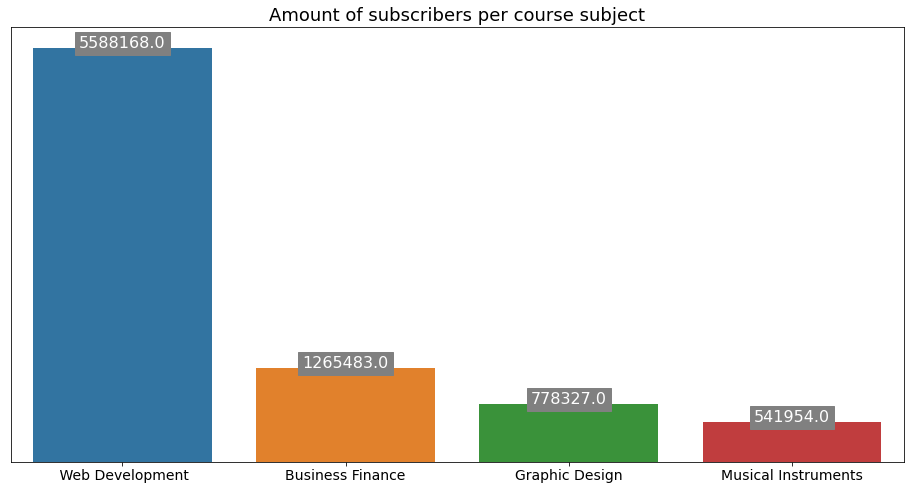

In [14]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x= table.index, y= table.values )
ax.set_title('Amount of subscribers per course subject', fontsize= 18)
for x, y in zip(range(0,len(table.index)), table.values):
    plt.annotate(str(y), xy = (x, y+10), fontsize = 16, backgroundcolor = 'grey', color = 'white', ha='center')
ax.set_yticks([])
ax.set_xlabel('')
plt.xticks(fontsize=14)
plt.show()

Web development courses is the most popular course on udemy

In [15]:
def plot_barchart(data,x,y, title):
    plt.figure(figsize=(16,8))
    ax = sns.barplot(x= x, y= y )
    ax.set_title(title, fontsize=18)
    for x, y in zip(range(0,len(x)),y):
        plt.annotate(f'{y:.2f}', xy = (x, y), fontsize = 16, backgroundcolor = 'grey', color = 'white', ha='center', va='bottom')
    ax.set_yticks([])
    ax.set_xlabel('')
    plt.xticks(fontsize=14)
    plt.show()

In [16]:
table = udemy[udemy['price']!= 0].groupby('level')['num_subscribers'].sum()
table

level
All Levels            4228468.0
Beginner Level        3038469.0
Expert Level            93233.0
Intermediate Level     813762.0
Name: num_subscribers, dtype: float64

## How many subscribers does each level have?

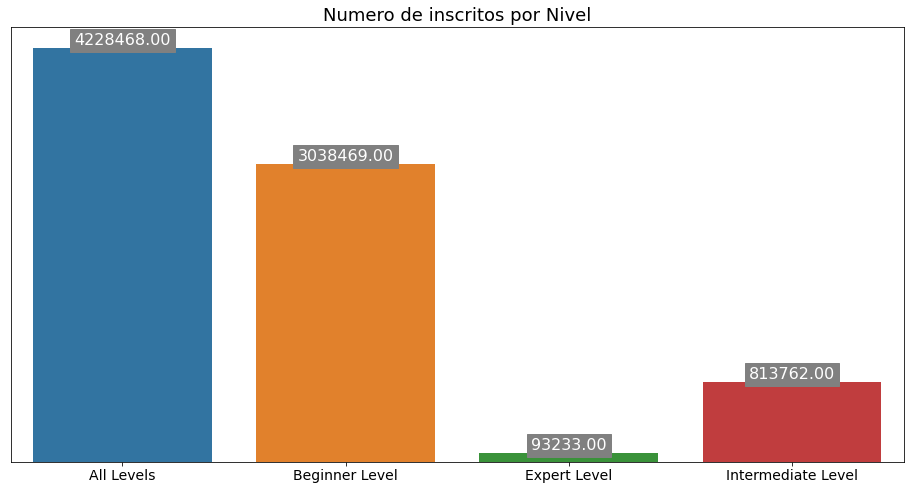

In [17]:
plot_barchart(table, table.index, table.values, 'Numero de inscritos por Nivel')

Complete courses seens to attract more people

In [18]:
def plot_hist(data, title):
    plt.figure(figsize=(16,8))
    ax = sns.histplot(data)
    ax.set_title(title, fontsize = 18)
    plt.show()

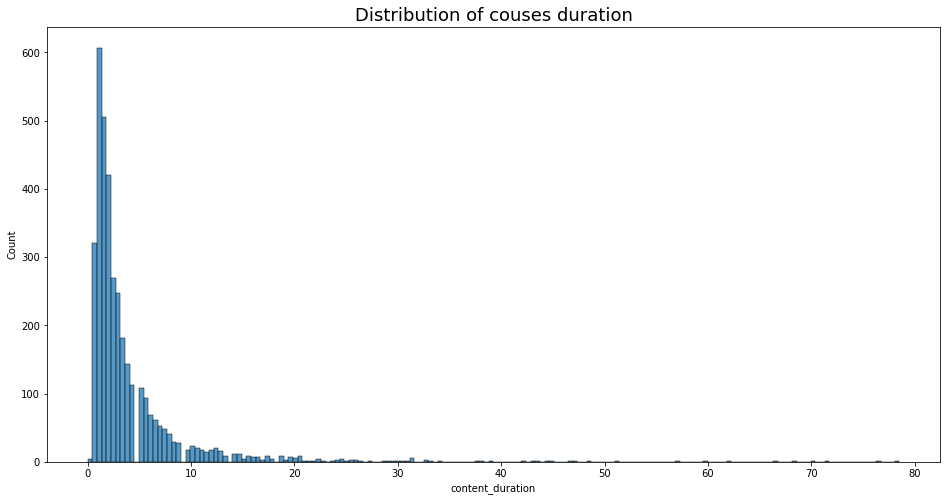

In [19]:
plot_hist(udemy['content_duration'],'Distribution of couses duration')

The most part of the courses takes less than 10 hours to conclude

## Creating courses duration categories

In [20]:
udemy['content_duration_category'] = np.where(udemy['content_duration'].between(1, 4),'short duration',
         np.where(udemy['content_duration'].between(5,10),'medium duration','long duration'))

udemy.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,content_duration_category
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,long duration
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,short duration
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,long duration
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,short duration
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,long duration


In [21]:
table = udemy.groupby('content_duration_category')['num_subscribers'].sum()
table

content_duration_category
long duration      3379764.0
medium duration    1992052.0
short duration     6388667.0
Name: num_subscribers, dtype: float64

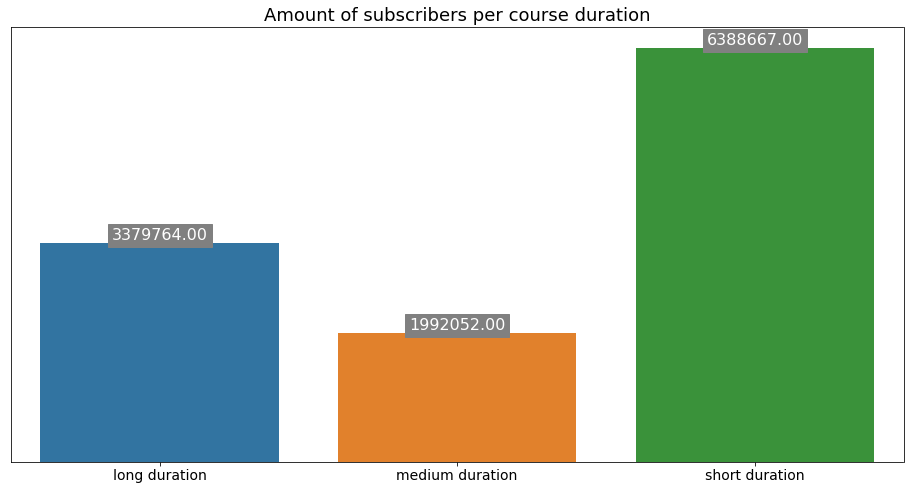

In [22]:
plot_barchart(table, table.index, table.values, 'Amount of subscribers per course duration')

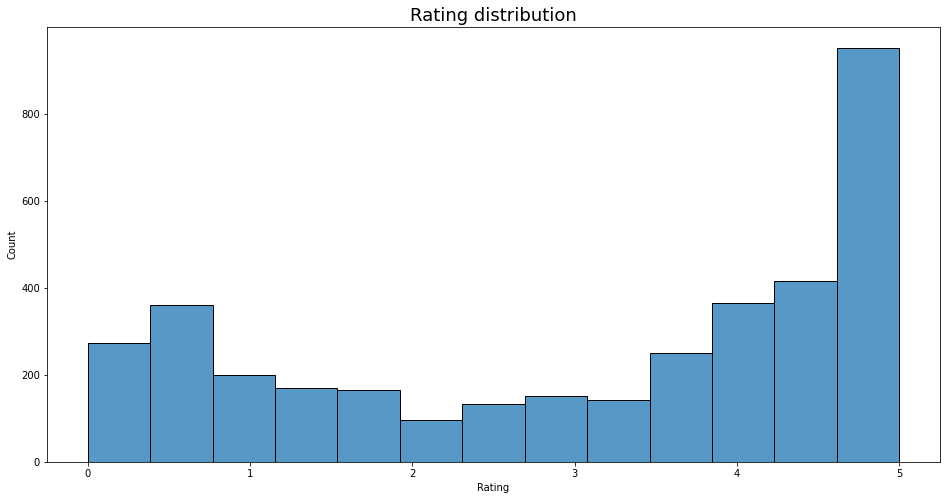

In [23]:
plot_hist(udemy['Rating']*5,'Rating distribution')

The most part of the courses got good ratings

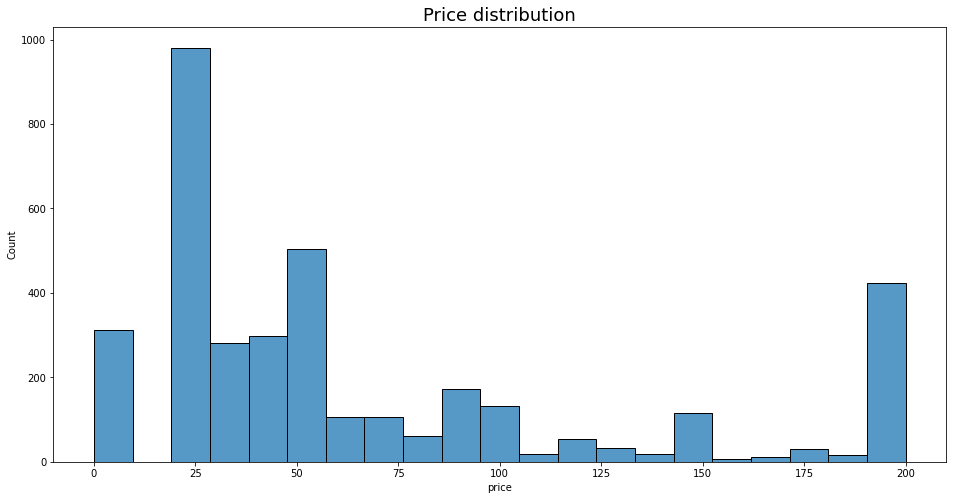

In [24]:
plot_hist(udemy['price'],'Price distribution')

## What is the average price per course subject?

In [25]:
table = udemy.groupby('subject')['price'].mean()
table

subject
 Web Development       77.036575
Business Finance       68.694374
Graphic Design         57.890365
Musical Instruments    49.558824
Name: price, dtype: float64

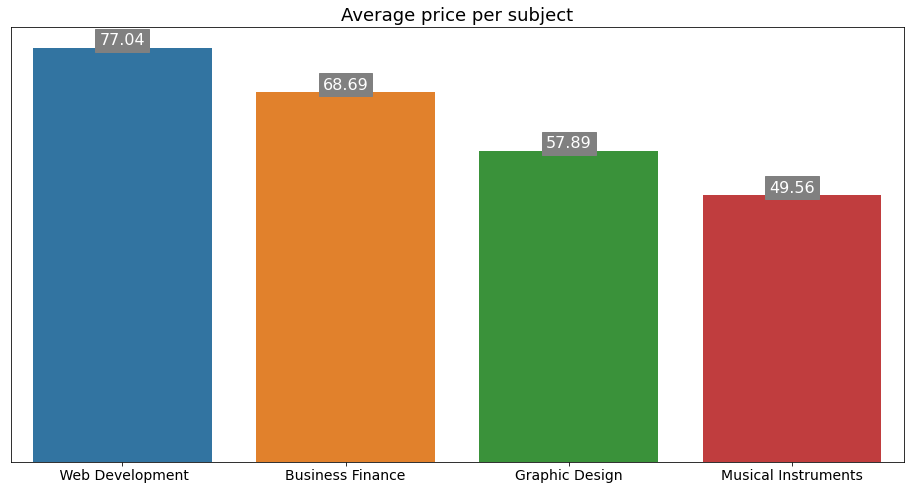

In [26]:
plot_barchart(table, table.index, table.values, 'Average price per subject')

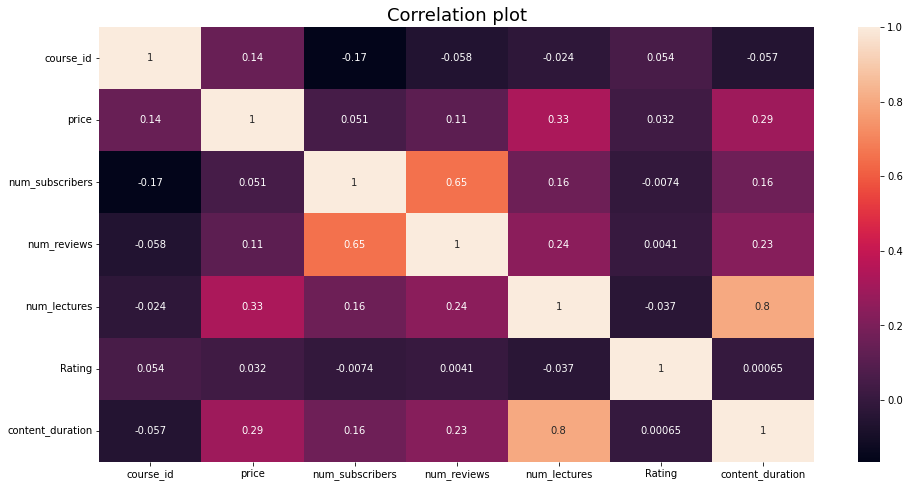

In [27]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(udemy.corr(), annot=True)
ax.set_title('Correlation plot', fontsize = 18)
plt.show()

There is no significant correlation between the data. Because content duration and num_lectures are colinear as well as num reviews and num subscribers

In [28]:
udemy.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'content_duration_category'],
      dtype='object')

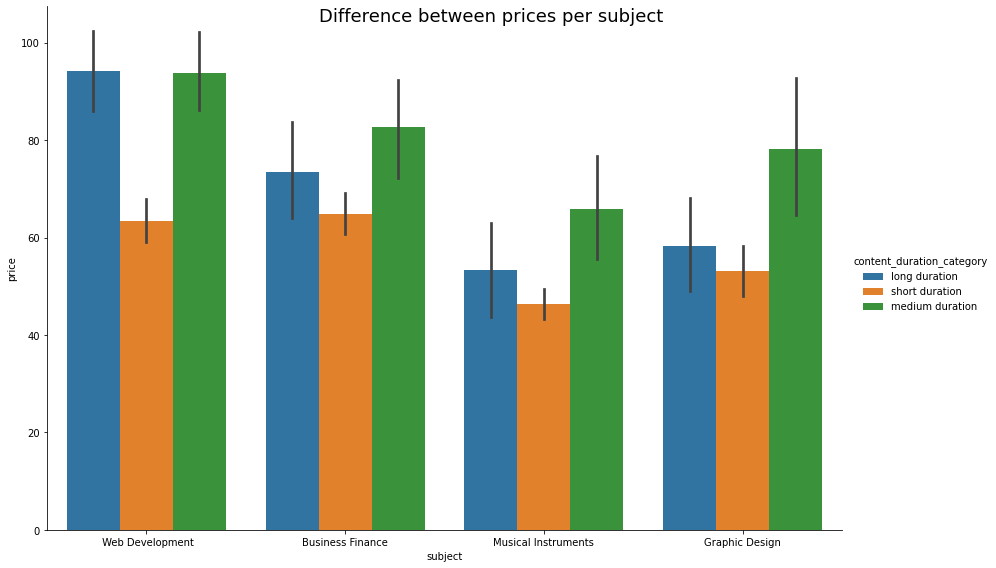

In [29]:
g= sns.catplot(data =udemy, x='subject', y='price', hue='content_duration_category', kind="bar", height=8, aspect=1.5)
g.fig.suptitle('Difference between prices per subject', fontsize=18)
plt.show()